In [1]:
import keras
import tensorflow
import pandas as pd

In [2]:
train_path="C:/Users/91832/Downloads/test_set/train (cat and dog)"
test_path="C:/Users/91832/Downloads/test_set/test (cat and dog)"

In [3]:
#imagedatagenerator is used for rescale the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
X = ImageDataGenerator(rescale=1./255)#255 is fixed number and each img is divided by 1
y = ImageDataGenerator(rescale=1./255)

In [5]:
X_data = X.flow_from_directory(
    train_path,
    color_mode="rgb",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)


Found 1623 images belonging to 2 classes.


In [6]:
y_data = y.flow_from_directory(
    test_path,
    color_mode="rgb",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

Found 400 images belonging to 2 classes.


In [7]:
# Build the architecture

# CNN

# Conv2D= Dividing pixels into array
#Maxpool2d=fitering features(imp fea) &2 by 2 matrics
#Flatten=it takes only one array by usin imp feature it accept only one array
#dense layer=fully connected layers(connected to 1 by 1 layer)
from keras.models import Sequential

from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [8]:
# Input + Convolation Layer

model = Sequential()
# filters= random weightes min(32) and max
#kernal size=
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(150,150,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=64,activation="relu"))

model.add(Dense(units=1,activation="sigmoid"))

C:\Users\91832\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
#fit the model with x_data,y_data & epchos=1--> no.of times to pass the data
model.fit(X_data,validation_data=y_data,epochs=1)

C:\Users\91832\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 365ms/step - accuracy: 0.5077 - loss: 2.8369 - val_accuracy: 0.5650 - val_loss: 0.6788


In [11]:
# Single Image Prediction

In [12]:
from keras.preprocessing.image import load_img,img_to_array

In [32]:
img=load_img("C:/Users/91832/Downloads/cat.jpeg",target_size=(150,150))#load img

In [33]:
pixel_img = img_to_array(img)#to convert img into array 

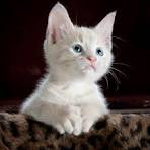

In [34]:
img

In [35]:
pixel_img = pixel_img/255.0

In [36]:
import numpy as np

pixel_img = np.expand_dims(pixel_img,axis=0)

In [37]:
model.predict(pixel_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.4071164]], dtype=float32)

In [38]:
img1=load_img("C:/Users/91832/Downloads/dog.jpeg",target_size=(150,150))#load img

In [39]:
pixel_img1 = img_to_array(img1)#to convert img into array 

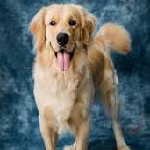

In [40]:
img1

In [41]:
pixel_img1 = pixel_img1/255.0

In [42]:
import numpy as np

pixel_img1 = np.expand_dims(pixel_img1,axis=0)

In [43]:
model.predict(pixel_img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.4482288]], dtype=float32)

In [44]:
X_data.class_indices

{'cats': 0, 'dogs': 1}

In [47]:
# save the model
import pickle

In [ ]:
pickel